<a href="https://colab.research.google.com/github/UmbertoB/neural-networks-research/blob/main/research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
!rm -rf cloned_repo
!git clone -l -s https://github.com/UmbertoB/neural-networks-research.git cloned_repo
import cloned_repo.model_factory as model_factory
import cloned_repo.metrics_builder as metrics_builder
from cloned_repo.utils.plot_history import plot_history

Cloning into 'cloned_repo'...
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 74 (delta 29), reused 59 (delta 18), pack-reused 0
Unpacking objects: 100% (74/74), done.


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, ZeroPadding2D, Flatten, Dense, Activation, Dropout, \
    GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

batch_size = 15
alpha = 1e-3
epochs = 30
input_shape = (200, 200, 3)
layers = [Flatten(input_shape=input_shape),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')]

history, model, train_images, validation_images, test_images = model_factory.generate_model('drive/MyDrive/DATASET', input_shape, batch_size, alpha, epochs, layers)
# model = models.load_model('model_one.hdf5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 120000)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                7680064   
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 7,680,129
Trainable params: 7,680,129
Non-trainable params: 0
_________________________________________________________________
Modelo Compilado...
drive/MyDrive/DATASET
Found 2100 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
Iniciando treino do Modelo...
Epoch 1/30
140/140 [==============================] - ETA: 0s - loss: 5.6376 - acc: 0.6500
Epoch 1: val_acc improv

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

image_gen = ImageDataGenerator(rescale=1 / 255)
test_generator = image_gen.flow_from_directory('drive/MyDrive/DATASET/test', target_size=(200, 200),
                                        shuffle=False,
                                        class_mode='binary',
                                        batch_size=batch_size,
                                        save_to_dir=None)
print('\n')
metrics_builder.generate_confusion_matrix(model, test_generator, batch_size)

print('\n')
metrics_builder.generate_classification_report(model, test_generator, batch_size)

Found 300 images belonging to 2 classes.


Confusion Matrix
[[144   6]
 [102  48]]


Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is “specificity”.
Classification Report
              precision    recall  f1-score   support

         Yes       0.59      0.96      0.73       150
          No       0.89      0.32      0.47       150

    accuracy                           0.64       300
   macro avg       0.74      0.64      0.60       300
weighted avg       0.74      0.64      0.60       300



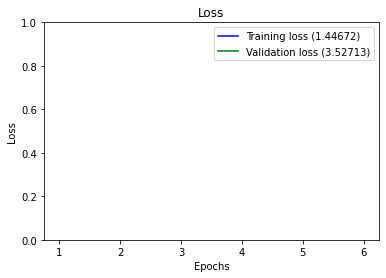

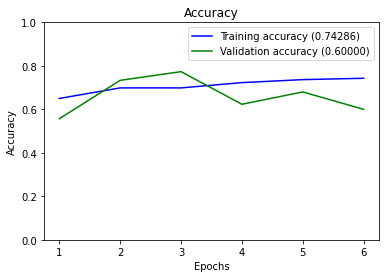

In [20]:
plot_history(history)

In [34]:
accuracy(model, (200, 200, 3))

NameError: ignored